# Gradient Descent

La **squared error loss** function è utile quando abbiamo a che fare con problemi di linear regression su dataset piccoli. Se un dataset è molto grande, o la funzione obiettivo non ammette un minimizzatore analitico, può essere computazionalmente costoso - quindi usiamo altri metodi, che non sono in forma chiusa.

In questa lezione introduciamo il metodo **Gradient Descent** (discesa del gradiente), uno dei modelli più fondamentali nel supervised learning per i problemi di ottimizzazione basati su gradiente.

Per semplificare la comprensione di questo metodo risulta utile analizzarne l'interpretazione geometrica:  
considerando la nostra funzione costo $ J(\theta) $ questa possiamo interpretarla come una superficie nello spazio definita nello spazio dei parametri. Un qualsiasi vettore dei parametri di modello $ \theta \in R^{p+1} $ non risulta essere nient'altro che un generico punto su questa superficie per un dato valore di parametri $ [\theta_0 ... \theta_n] $. Allora, il vettore ottimo $ \hat{\theta} $ non sarà altro che il punto più basso di questa superficie.  

Mentre nella *Linear Regression* andavamo ad analizzare il problema attraverso la minimizzazione del quadrato dei residui, che ci permetteva di avere una soluzione ottimale in forma chiusa (soluzione in un numero finito di operazioni), con la *Gradient Descent* risolviamo il problema attraverso una intuizione "geometrica": poichè il nostro obiettivo è raggiungere il punto più basso della curva, non ci basterà che muoverci in maniera iterativa *sulla curva* nella direzione del punto più basso. Ma come facciamo se non sappiamo qual è il punto più basso?  
Geometricamente, sappiamo che il *gradiente* della funzione costo $ J(\theta) $ ovvero $ \nabla_{\theta}J(\theta) $ punta nella direzione di crescita più ripida del costo (dipendente dai residui). Allora, muovendoci nella direzione opposta di questo gradiente, punteremo nella direzione di discesa, e dunque verso un minimo.  

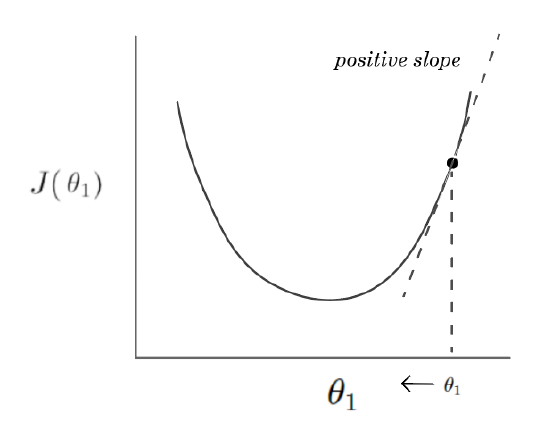

### Sensitività ai parametri e movimento

Abbiamo detto che il vettore $ \theta $ rappresenta un punto sulla superficie. Come ogni punto, questo è dotato di cordinate che lo posizionano nello spazio. Allora, ogni singola componente $ \theta_i $ del vettore dei parametri non sarà altro che una coordinata sulla superficie costo.  
Modificando una *componente* del vettore dei parametri e mantenendo fissi gli altri ci muoviamo lungo una specifica direzione di movimento.  
Il vettore gradiente $ \nabla_{\theta}J(\theta) $ è composto da componenti che rappresentano la sensibilità del costo rispetto a ciascuna coordinata. La componente $ i $-esima del gradiente, $ \frac{\partial J(\theta)}{\partial \theta_i} $ è il *gradiente parziale*, e ci dice quanto il costo cambia se modifichiamo la coordinata $ \theta_i $ mantenendo fissi gli altri parametri. Questa componente è detta "sensitività" del costo rispetto alla coordinata $ \theta_i $.  

Vogliamo però capire, una volta identificata la direzione di discesa, di quanto dobbiamo muoverci in quella direzione. Per questo motivo, introduciamo un nuovo iperparametro, detto **learning rate** $ \gamma $, che ci dice di quanto dobbiamo scalare il gradiente per muoverci nella direzione di discesa. Il learning rate controlla la velocità di apprendimento del modello: tanto è più piccolo e tanto più l'apprendimento sarà lento ma stabile; tanto è più grande e tanto più l'apprendimento sarà veloce ma instabile, causando oscillazioni o divergenze (minimo globale non raggiunto).

Dunque, come modifichiamo i parametri del modello? Ovvero come facciamo ad aggiornare i parametri del modello?  
Il processo di aggiornamento dei parametri del modello è dato dalla seguente formula:
$ \theta^{t+1} := \theta^{t} - \gamma \nabla_{\theta}J(\theta^{t}) $
Questa formula ci dice che per aggiornare i parametri del modello per il passo *successivo*, dobbiamo sottrarre al vettore dei parametri $ \theta $ del passo attuale, il prodotto tra il learning rate $ \gamma $ e il gradiente $ \nabla_{\theta}J(\theta) $. In questo modo ci muoviamo nella direzione di discesa, scalando il passo di discesa con il learning rate, ovvero mantenendoli *proporzinali*.  Da questa formula, possiamo notare che se il gradiente è grande, allora il passo di discesa sarà grande, e viceversa.  Inoltre, possiamo osservare la natura **iterativa** di questo metodo rispetto alla soluzione in forma chiusa: per raggiungere il punto più basso della curva, dobbiamo iterare questo processo di aggiornamento dei parametri del modello fino a quando non raggiungiamo un punto in cui il gradiente è sufficientemente piccolo (ovvero, quando siamo vicini al minimo).

### Gradiente della Regressione Lineare e Quadrati Minimi (least squares)

In problemi di regressione lineare con *loss function* basata sull'errore quadratico medio, la funzione costo è una curva convessa. Questo garantisce il fatto che:
- ci sia sempre un *singolo* minimo globale
- la superficie sia liscia, e dunque il gradiente sia ben definito in ogni punto della curva
- seguendo la discenza da qualsiasi punto della curva, raggiungeremo sempre il minimo globale
E' proprio grazie a queste proprietà geometriche che possiamo applicare il metodo di Gradient Descent per risolvere il problema di ottimizzazione della regressione lineare.  
  
Il gradiente della funzione costo $ J(\theta) $ per la regressione lineare, ipotizzando una funzione costo basata sui quadrati minimi, è dato dalla seguente formula:
$$  
\nabla_{\theta}J(\theta) = \frac{2}{n} X^T(X\theta - y) 
$$ 
Questa formula ci dice che il gradiente è dato da una matrice di covarianza tra le feature (ovvero $ X^T X $) e una matrice di covarianza tra le feature e i target (ovvero $ X^T y $). Ponendo a 0 il gradiente otteniamo la forma normale dell'equazione, ma in questo caso utilizzeremo un metodo iterativo per minimizzare il costo.

### Soluzione 1: Batch Gradient Descent
Il metodo di Batch Gradient Descent consiste nel calcolare il gradiente su tutto il dataset ad ogni iterazione, e poi aggiornare i parametri del modello. Questo metodo è molto efficiente per dataset di piccole dimensioni, ma può essere molto lento per dataset di grandi dimensioni, poiché richiede di calcolare il gradiente su tutto il dataset ad ogni iterazione.

La regola di aggiornamento dei parametri del modello per il Batch Gradient Descent è data dalla seguente formula:
$ \theta^{t+1} = \theta^{t} - \gamma\nabla J(\theta) = \theta^{t} - \frac{2\gamma}{n} X^T(X\theta^{t} - y) $  
Dunque l'algoritmo è:
1. si parte da un vettore di parametri iniziale $ \theta^0 $  
2. (loop)  
2.1. si calcola il vettore dei residui sull'intero dataset al passo t $ r^t = X\theta^t - y $  
2.2. si calcola il gradiente al passo t $ \nabla J(\theta^t) = \frac{2}{n} X^T r^t $  
2.3. si aggiorna il vettore dei parametri $ \theta^{t+1} = \theta^t - \gamma \nabla J(\theta^t) $ 
3. si ripete il loop fino a quando non si raggiunge un punto in cui il gradiente è sufficientemente piccolo (ovvero, quando siamo vicini al minimo).  

### Learning Rate e Feature Scaling

Il learning rate è un iperparametro che controlla la velocità di apprendimento del modello. Se il learning rate è troppo piccolo, l'apprendimento sarà lento e potrebbe richiedere molte iterazioni per convergere al minimo globale. Se il learning rate è troppo grande, l'apprendimento sarà veloce ma instabile, causando oscillazioni o divergenze (minimo globale non raggiunto). Per questo motivo, è importante scegliere un learning rate appropriato per il nostro problema. Un modo per scegliere un learning rate appropriato è quello di partire da una serie di valori candidati $ \gamma = [ \gamma_0 \gamma_1 ... \gamma_m] $ e progressivamente scegliere il valore più grande che consente una riduzione smooth della funzione costo.  

Un altro elemento da tenere in considerazione, come abbiamo già visto negli algoritmi k-NN e DT, è la scala delle feature del dataset. Se le feature del dataset hanno scale molto diverse, il gradiente potrebbe essere molto più grande per alcune feature rispetto ad altre, e questo potrebbe causare problemi di convergenza. Per questo motivo, è importante utilizzare una tecnica chiamata **feature scaling** (scalatura delle feature), che consiste nel normalizzare le feature del dataset in modo che abbiano una media di 0 e una deviazione standard di 1. In questo modo, tutte le feature avranno lo stesso ordine di grandezza, e il learning rate potrà essere scelto in modo più semplice, poiché non dovremo preoccuparci di feature con valori molto grandi o molto piccoli che potrebbero causare problemi di convergenza.  
Le principali tecniche di feature scaling sono la **standardizzazione** (standardization) e la **normalizzazione** (normalization). La standardizzazione consiste nel sottrarre la media e dividere per la deviazione standard, mentre la normalizzazione consiste nel scalare i valori delle feature in un intervallo specifico, ad esempio [0, 1].  
Una volta scalate le feature, generalmente un singolo learning rate è sufficiente per tutte le feature, poiché tutte le feature avranno lo stesso ordine di grandezza.

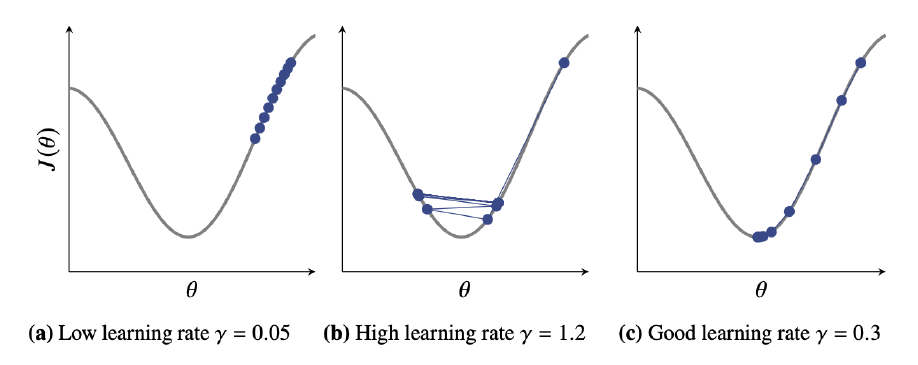

---

# Check diagnostici

Il plot "J sul numero di iterazioni" è un ottimo strumento di diagnostica.  
1. Ci aspettiamo che decresca in maniera "smooth" per il Batch Gradient Descent, e che abbia un trend rumoroso ma discendente per Stochasting Gradient Descent;
2. se J è piatto già dall'inizio, probabilmente $\gamma$ è troppo piccolo o le feature non correttamente scalate;
3. se J diverge, probabilmente $ \gamma $ è troppo grande;

---

In [2]:
'''
Testiamo gli algoritmi che abbiamo studiato: (1) Batch Gradient Descent, (2) Stochastic Gradient Descent, (3) Maximum Likelihood.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
whine_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/whine-quality/winequality-red.csv", sep=';')
X_train, X_test, y_train, y_test = train_test_split(whine_set.drop("quality", axis=1), whine_set["quality"], test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Numero campioni sufficiente? True
Batch Gradient Descent - Train MSE: 0.4242, Train MAE: 0.4995
Batch Gradient Descent - Test MSE: 0.3898, Test MAE: 0.5035
Predizione per il primo campione di test: 5.3423, Valore reale: 6


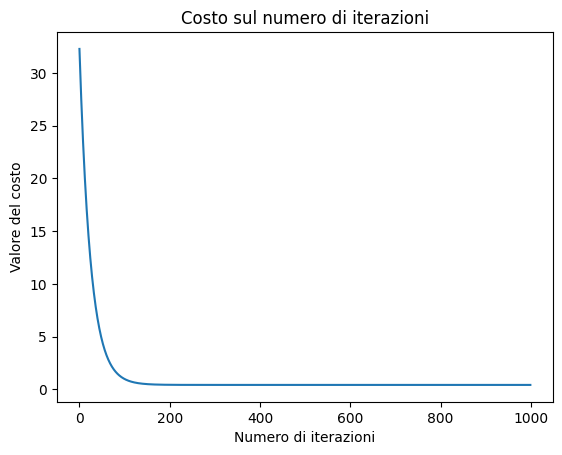

In [45]:
'''
1. Batch Gradient Descent (full batch)
'''
import numpy as np
import matplotlib.pyplot as plt

# Creiamo Xb aggiungendo una colonna di 1 a X_train_scaled per il termine di bias.
Xb = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
# Convertiamo y_train in array NumPy con to_numpy() per allinearci ai calcoli vettoriali.
y_train_values = y_train.to_numpy()
# Inizializziamo theta a zeri: un parametro per ogni feature più il bias.
theta = np.zeros(Xb.shape[1])

# impostiamo il learning rate (gamma) e il numero massimo di iterazioni (EPOCHS) per il ciclo di aggiornamento dei parametri.
gamma = 0.01
EPOCHS = 1000
n_samples = Xb.shape[0]

# inizializzo il vettore dei costi per la diagnostica
J_values = np.zeros(EPOCHS)

# Verifico che: n_samples > Xb.shape[1] (number of features + 1) ?
print("Numero campioni sufficiente?", n_samples > Xb.shape[1] )

# Implementiamo il ciclo di aggiornamento dei parametri theta usando il Batch Gradient Descent.
for _ in range(EPOCHS):
    predictions = Xb @ theta # @ usato come dot product per i numpy.array
    gradient = (2 / n_samples) * Xb.T @ (predictions - y_train_values)
    theta -= gamma * gradient
    cost = np.mean((predictions - y_train_values) ** 2)
    J_values[_] = cost

train_mse = np.mean((Xb @ theta - y_train_values) ** 2)
train_mae = np.mean(np.abs(Xb @ theta - y_train_values))
print(f"Batch Gradient Descent - Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")

# Testiamo il modello sui dati di test: applichiamo la stessa trasformazione di scaling a X_test, aggiungiamo la colonna di 1 per il bias, e calcoliamo le predizioni usando i parametri theta ottenuti dal training. Infine, calcoliamo MSE e MAE sui dati di test.
X_test_scaled = scaler.transform(X_test)
Xb_test = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_test_values = y_test.to_numpy()
test_mse = np.mean((Xb_test @ theta - y_test_values) ** 2) # MSE sui dati di test, utilizzando il theta ottenuto dal training.
test_mae = np.mean(np.abs(Xb_test @ theta - y_test_values))
print(f"Batch Gradient Descent - Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}")

# Facciamo una predizione sul primo campione di test
new_sample = X_test_scaled[0:1] # selezioniamo il primo campione di test
new_sample_b = np.c_[np.ones((new_sample.shape[0], 1)), new_sample] # aggiungiamo la colonna di 1 per il bias.
predicted_quality = new_sample_b @ theta # calcoliamo la predizione usando i parametri theta ottenuti dal training.
print(f"Predizione per il primo campione di test: {predicted_quality[0]:.4f}, Valore reale: {y_test_values[0]}")

# Check diagnostici: plot J / numero iterazioni
plt.plot(J_values)
plt.xlabel("Numero di iterazioni")
plt.ylabel("Valore del costo")
plt.title("Costo sul numero di iterazioni")
plt.show()

In [41]:
# Proviamo il Gradient descent con criteri di stop differenti
theta = np.zeros(Xb.shape[1]) # re-inizializziamo theta a zeri
gamma = 0.01
tolerance = 1e-6
previous_cost = float('inf')

"""
1. Aggiornamento basato su tolleranza nel MSE
"""
for _ in range(EPOCHS):
    predictions = Xb @ theta
    gradient = (2 / n_samples) * Xb.T @ (predictions - y_train_values)
    theta -= gamma * gradient
    
    # Calcoliamo il costo (MSE) per verificare il criterio di stop basato sulla tolleranza.
    cost = np.mean((Xb @ theta - y_train_values) ** 2)
    if abs(previous_cost - cost) < tolerance:
        print(f"1) Convergenza raggiunta dopo {_}/{EPOCHS} iterazioni.")
        break
    previous_cost = cost
train_mse = np.mean((Xb @ theta - y_train_values) ** 2)
train_mae = np.mean(np.abs(Xb @ theta - y_train_values))
print(f"Batch Gradient Descent (tolerance) - Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")

"""
2. Aggiornamento basato su tolleranza nel cambiamento del costo
""" 
theta = np.zeros(Xb.shape[1]) # re-inizializziamo theta a zeri
gamma = 0.01
tolerance = 1e-6
previous_cost = float('inf')
n_samples = Xb.shape[0]
__factor = 2 / n_samples

for _ in range(EPOCHS):
    y_predicted_values = (Xb @ theta)
    residual_values = (y_predicted_values - y_train_values)
    gradient = __factor * (Xb.transpose() @ residual_values)
    cost = np.mean(residual_values ** 2)
    theta -= gamma * gradient

    if np.isfinite(previous_cost) and previous_cost > 0:
        if (abs(cost - previous_cost) / previous_cost) < tolerance:
            print(f"2) Convergenza raggiunta dopo {_}/{EPOCHS} iterazioni.")
            break
    previous_cost = cost

train_mse = np.mean((Xb @ theta - y_train_values) ** 2)
train_mae = np.mean(np.abs(Xb @ theta - y_train_values))
print(f"Batch Gradient Descent (tolerance) - Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")

"""
3. Aggiornamento basato su tolleranza nella norma del gradiente
"""
theta = np.zeros(Xb.shape[1]) # re-inizializziamo theta a zeri
gamma = 0.01
tolerance = 1e-6
n_samples = Xb.shape[0]
__factor = 2 / n_samples

for _ in range(EPOCHS):
    y_predicted_values = Xb @ theta
    residual_values = y_predicted_values - y_train_values
    gradient = __factor * Xb.T @ residual_values
    theta -= gamma * gradient
    if np.linalg.norm(gradient) < tolerance:
        print(f"3) Convergenza raggiunta dopo {_}/{EPOCHS} iterazioni.")
        break

train_mse = np.mean((Xb @ theta - y_train_values) ** 2)
train_mae = np.mean(np.abs(Xb @ theta - y_train_values))
print(f"Batch Gradient Descent (tolerance) - Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")

1) Convergenza raggiunta dopo 437/1000 iterazioni.
Batch Gradient Descent (tolerance) - Train MSE: 0.4244, Train MAE: 0.4993
2) Convergenza raggiunta dopo 571/1000 iterazioni.
Batch Gradient Descent (tolerance) - Train MSE: 0.4243, Train MAE: 0.4994
Batch Gradient Descent (tolerance) - Train MSE: 0.4242, Train MAE: 0.4995


---

Stochastic Gradient Descent - Train MSE: 0.4251, Train MAE: 0.4986
Stochastic Gradient Descent - Test MSE: 0.3896, Test MAE: 0.5023

Tabella delle predizioni:
    Predicted  Actual     Error  Absolute Error  Error %
0    5.320338       6 -0.679662        0.679662    11.33
1    5.051021       5  0.051021        0.051021     1.02
2    5.629141       6 -0.370859        0.370859     6.18
3    5.445771       5  0.445771        0.445771     8.92
4    5.739836       6 -0.260164        0.260164     4.34
5    5.262251       5  0.262251        0.262251     5.25
6    5.001558       5  0.001558        0.001558     0.03
7    5.127438       5  0.127438        0.127438     2.55
8    5.758756       5  0.758756        0.758756    15.18
9    5.698194       6 -0.301806        0.301806     5.03
10   6.151540       7 -0.848460        0.848460    12.12
11   5.239691       3  2.239691        2.239691    74.66
12   5.553077       5  0.553077        0.553077    11.06
13   5.242444       5  0.242444        0.24

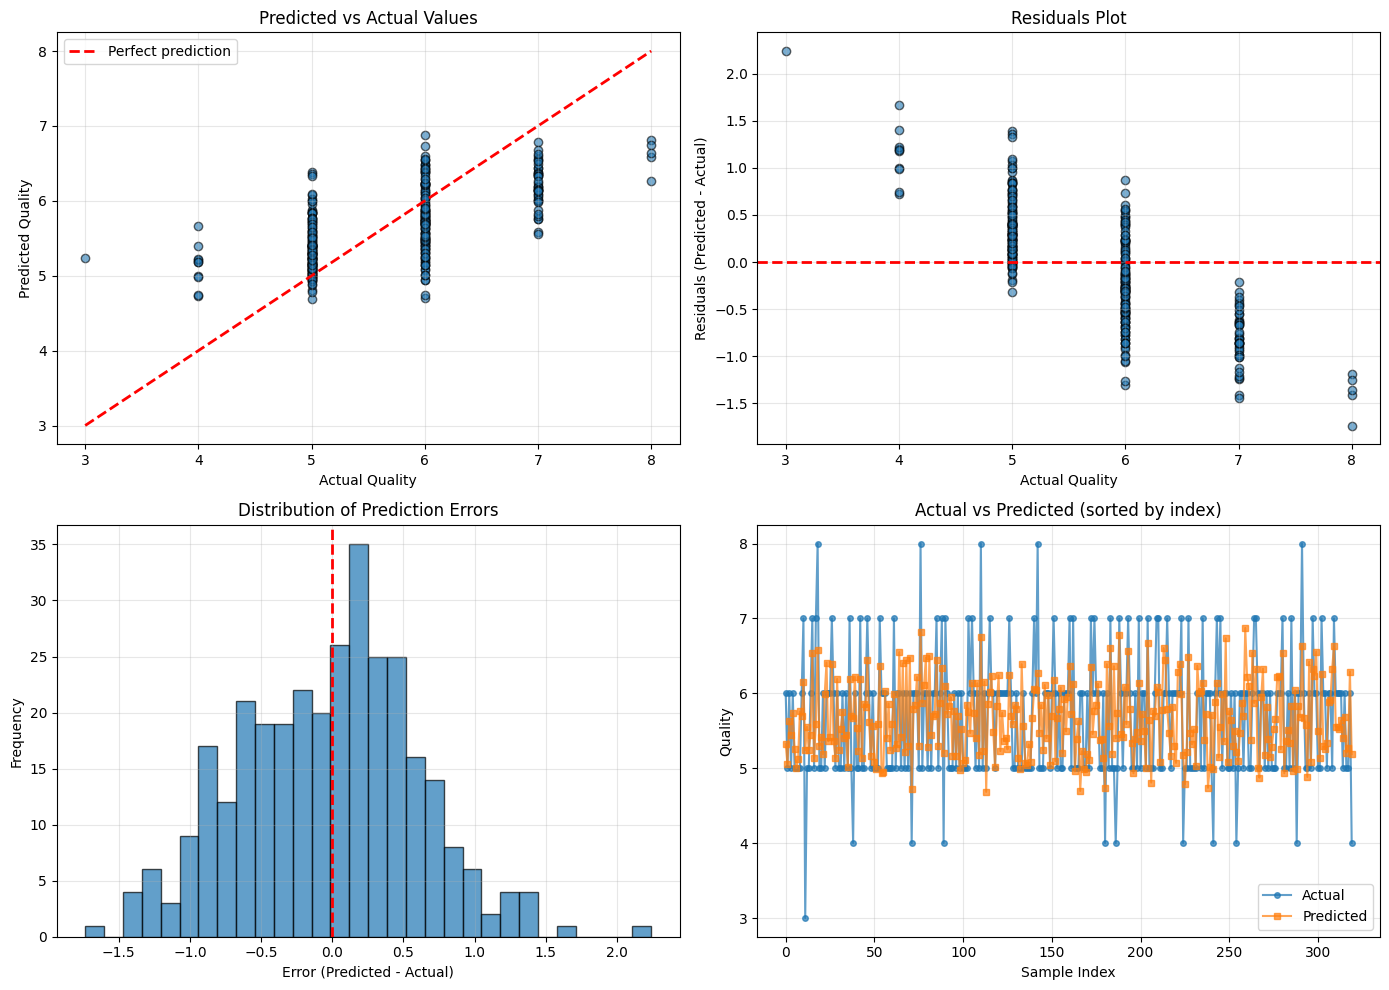


--- Statistiche degli Errori ---
Errore medio (bias): -0.0306
Errore assoluto medio: 0.5023
Deviazione standard errori: 0.6244
Errore massimo: 2.2397
Errore minimo: 0.0016


In [6]:
"""
Stochastic Gradient Descent (SGD)
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
whine_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/whine-quality/winequality-red.csv", sep=';')
X_train, X_test, y_train, y_test = train_test_split(whine_set.drop("quality", axis=1), whine_set["quality"], test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import SGDRegressor
predictor = SGDRegressor(loss='squared_error')
predictor.fit(X_train_scaled, y_train)
train_mse = np.mean((predictor.predict(X_train_scaled) - y_train.values) ** 2)
train_mae = np.mean(np.abs(predictor.predict(X_train_scaled) - y_train.values))
print(f"Stochastic Gradient Descent - Train MSE: {train_mse:.4f}, Train MAE: {train_mae:.4f}")

test_predictions = predictor.predict(X_test_scaled)
test_mse = np.mean((test_predictions - y_test.values) ** 2)
test_mae = np.mean(np.abs(test_predictions - y_test.values))
print(f"Stochastic Gradient Descent - Test MSE: {test_mse:.4f}, Test MAE: {test_mae:.4f}")

# Creiamo un DataFrame per visualizzazione tabellare
results_df = pd.DataFrame({
    'Predicted': test_predictions,
    'Actual': y_test.values,
    'Error': test_predictions - y_test.values,
    'Absolute Error': np.abs(test_predictions - y_test.values)
})
results_df['Error %'] = (results_df['Absolute Error'] / results_df['Actual'] * 100).round(2)
print("\nTabella delle predizioni:")
print(results_df.head(20))

# Scatter plot: predicted vs actual
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Predicted vs Actual
axes[0, 0].scatter(y_test.values, test_predictions, alpha=0.6, edgecolors='k')
axes[0, 0].plot([y_test.values.min(), y_test.values.max()], 
                 [y_test.values.min(), y_test.values.max()], 
                 'r--', lw=2, label='Perfect prediction')
axes[0, 0].set_xlabel('Actual Quality')
axes[0, 0].set_ylabel('Predicted Quality')
axes[0, 0].set_title('Predicted vs Actual Values')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Residuals plot
axes[0, 1].scatter(y_test.values, results_df['Error'], alpha=0.6, edgecolors='k')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0, 1].set_xlabel('Actual Quality')
axes[0, 1].set_ylabel('Residuals (Predicted - Actual)')
axes[0, 1].set_title('Residuals Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of errors
axes[1, 0].hist(results_df['Error'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Error (Predicted - Actual)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors')
axes[1, 0].grid(True, alpha=0.3)

# 4. Actual vs Index (trends)
axes[1, 1].plot(y_test.values, label='Actual', alpha=0.7, marker='o', markersize=4)
axes[1, 1].plot(test_predictions, label='Predicted', alpha=0.7, marker='s', markersize=4)
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Quality')
axes[1, 1].set_title('Actual vs Predicted (sorted by index)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiche degli errori
print("\n--- Statistiche degli Errori ---")
print(f"Errore medio (bias): {results_df['Error'].mean():.4f}")
print(f"Errore assoluto medio: {results_df['Absolute Error'].mean():.4f}")
print(f"Deviazione standard errori: {results_df['Error'].std():.4f}")
print(f"Errore massimo: {results_df['Absolute Error'].max():.4f}")
print(f"Errore minimo: {results_df['Absolute Error'].min():.4f}")

---

### Soluzione 2: Stochastic e Mini-batch Gradient Descent 

Il metodo del Gradient Descent calcola ad ogni passo $ t $ il gradiente su tutto il dataset.  
Se questo può risultare molto semplice per piccoli dataset, allo stesso tempo diventa computazionalmente oneroso per dataset molto grandi.  
Il metodo di Stochastic Gradient Descent (SGD) introduce una semplificazione che ci permette di ottenere un metodo approssimato, dunque meno preciso nella convergenza verso il minimo, ma molto più rapido e meno costoso.  
Consiste nel calcolare il gradiente su un *mini-batch* del dataset ad ogni iterazione $ t $, e poi aggiornare i parametri del modello. Questo metodo è molto più veloce per dataset di grandi dimensioni, ma può essere molto rumoroso, poiché il gradiente calcolato su un $ mini batch $ può essere molto diverso dal gradiente calcolato su tutto il dataset. 

**Regola di aggiornamento**  
Definito $ B_t \subset \{1,...,n\} $ un *subset* di indici campionati del dataset al passo $ t $, la regola di aggiornamento dei parametri del modello per lo Stochastic Gradient Descent è data dalla seguente formula:  
$$  
\theta^{t+1} = \theta^{t} - \frac{2\gamma^{t}}{|B_t|} X^{T}_{B_t}(X_{B_t}\theta^{(t)} - y_{B_t})  
$$  
Dove $ X_{B_t} $ è mini-batch del dataset sul subset di indici campionati, e $ Y_{B_t} $ è l'output del mini-batch.  
Dunque l'algoritmo è: 
1. si parte da un vettore di parametri iniziale $ \theta^0 $ 
2. (loop)  
    2.1. si campiona un mini-batch di indici $ B_t \subset \{1,...,n\} $  
    2.2. si calcola il vettore dei residui sul mini-batch al passo t -> $ r^t = X_{B_t}\theta^t - y_{B_t} $  
    2.3. si calcola il gradiente al passo $ t $: $ \nabla J(\theta^t) = \frac{2}{|B_t|} X^{T}_{B_t} r^t $  
    2.4. si aggiorna il vettore dei parametri $ \theta^{t+1} = \theta^t - \gamma^t \nabla J(\theta^t) $  
3. si ripete il loop fino a quando non si raggiunge un punto in cui il gradiente è sufficientemente piccolo (ovvero, quando siamo vicini al minimo).   

Il metodo di Stochastic Gradient Descent è molto più veloce per dataset di grandi dimensioni, ma può essere molto rumoroso, poiché il gradiente calcolato su un mini-batch può essere molto diverso dal gradiente calcolato su tutto il dataset. Per questo motivo, è importante scegliere un learning rate appropriato per il nostro problema, e anche utilizzare una tecnica chiamata **momentum** (momento), che consiste nell'aggiungere una componente di velocità al processo di aggiornamento dei parametri del modello, in modo da smorzare le oscillazioni causate dal rumore del gradiente calcolato su mini-batch.  
La dimensione del batch dipende dai vincoli di memoria dell'hardware, ma generalmente si utilizzano batch di dimensione compresa tra 32 e 256.  

### Criteri di Stop  
Fino ad ora abbiamo supposto che l'algoritmo di Gradient Descent si fermi quando raggiungiamo un punto in cui il gradiente è sufficientemente piccolo (ovvero, quando siamo vicini al minimo). Tuttavia, questo criterio di stop potrebbe non essere sempre pratico, poiché potrebbe richiedere un numero molto elevato di iterazioni per raggiungere un punto in cui il gradiente è sufficientemente piccolo. Per questo motivo, è importante utilizzare altri criteri di stop, come ad esempio:  
- **Cambiamenti relativi nel costo**: si può decidere di fermare l'algoritmo quando la variazione relativa del costo tra due iterazioni consecutive è inferiore a una soglia predefinita $ \epsilon $, ovvero quando $ \frac{|J(\theta^{t+1}) - J(\theta^t)|}{|J(\theta^t)|} < \epsilon $.  
- **Piccola norma del gradiente**: si può decidere di fermare l'algoritmo quando la norma del gradiente è inferiore a una soglia predefinita $ \epsilon $, ovvero quando $ ||\nabla J(\theta^t)|| < \epsilon $.  
- **Numero massimo di iterazioni**: si può decidere di fermare l'algoritmo dopo un numero massimo di iterazioni predefinito, ad esempio 1000 iterazioni.  
- **Validazione incrociata**: si può decidere di fermare l'algoritmo quando la performance del modello su un set di validazione inizia a peggiorare, indicando che il modello sta iniziando a sovradattarsi ai dati di addestramento.  
- **Early stopping**: si può decidere di fermare l'algoritmo quando la performance del modello su un set di validazione non migliora più per un certo numero di iterazioni consecutive, indicando che il modello ha raggiunto il punto di massimo apprendimento sui dati di addestramento.  


In [4]:
"""
3) Mini-batch Gradient Descent
"""
import numpy as np

# definiamo il modello GD come una funzione

def train(input, output, learning_rate = 0.01, batch_size = 32, max_iter = 1000):
    n_samples = input.shape[0]
    theta = np.zeros(input.shape[1])
    i = 0
    for _ in range(max_iter):
        if i < n_samples:
            j = min(i + batch_size, n_samples)
            x = input[i:j]
            y = output[i:j]
            residual = (x @ theta) - y
            gradient = (2 / batch_size) * x.T @ residual
            theta -= learning_rate * gradient
            i += batch_size
    return theta            

def predict(input, theta):
    return input @ theta

def mae(predictions, actual):
    return np.mean(np.abs(predictions - actual))

def mse(predictions, actual):
    return np.mean((predictions - actual) ** 2)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
whine_set = pd.read_csv("/workspaces/ml-foundations-cours-2026/whine-quality/winequality-red.csv", sep=';')
X_train, X_test, y_train, y_test = train_test_split(whine_set.drop("quality", axis=1), whine_set["quality"], test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

theta = train(X_train_scaled, y_train)
y_predicted = predict(X_test_scaled, theta)
print(f"Mini-batch Gradient Descent - Test MAE: {mae(y_predicted, y_test.values):.4f}, Test MSE: {mse(y_predicted, y_test.values):.4f}")

theta = train(X_train_scaled, y_train, batch_size=64)
y_predicted = predict(X_test_scaled, theta)
print(f"Mini-batch Gradient Descent (batch_size=64) - Test MAE: {mae(y_predicted, y_test.values):.4f}, Test MSE: {mse(y_predicted, y_test.values):.4f}")


Mini-batch Gradient Descent - Test MAE: 5.6620, Test MSE: 32.4740
Mini-batch Gradient Descent (batch_size=64) - Test MAE: 5.6704, Test MSE: 32.6191


---

### Solzuione 3: Maximum Likelihood  

In questo caso diamo una interpretazione probabilistica al problema di ottimizzazione della regressione lineare, e dunque al processo di apprendimento del modello. In particolare, cambiamo il punto di vista sul problema di ottimizzazione, non vendendolo più come un problema di *minimizzazione del costo* (quadrati minimi), ma come un problema di *massimizzazione della verosimiglianza* (maximum likelihood). Cerchiamo dunque quel vettore di parametri $ \theta $ che massimizza la probabilità di osservare i dati di addestramento, ovvero che massimizza la funzione di verosimiglianza $ L(\theta) = P(y|X, \theta) $.  
Il vettore $ \hat{\theta} = \arg\max_{\theta} L(\theta) $ è detto **massimo verosimile** (maximum likelihood), ed è il vettore di parametri che rende l'output osservato $ Y $ il più probabile possibile dato l'input $ X $. Per calcolare questa quantità, dobbiamo trovare un modello probabilistico per la misura del rumore.  

Partiamo da un campione del nostro dataset: $ y_i = \theta^T x_i + \epsilon_i $ dove $ \epsilon_i $ è un termine di rumore.  
Assunzioni:  
1. Il rumore $ \epsilon_i $ è indipendente e identicamente distribuito (i.i.d.)  
2. Il rumore $ \epsilon_i $ è distribuito secondo una distribuzione normale con media 0 e varianza $ \sigma^2 $, ovvero $ \epsilon_i \sim N(0, \sigma^2) $.  
3. Il rumore $ \epsilon_i $ è indipendente dall'input $ x_i $.  

Sotto queste assunzioni, possiamo scrivere la funzione di verosimiglianza come segue:  
$ L(\theta) = P(y|X, \theta) = \prod_{i=1}^{n} P(y_i|x_i, \theta) = \prod_{i=1}^{n} P(\epsilon_i = y_i - \theta^T x_i) $  
Ogni fattore della produttoria è la densità Gaussiana:  
$ P(\epsilon_i = y_i - \theta^T x_i) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \theta^T x_i)^2}{2\sigma^2}\right) $  
Dunque, la funzione di verosimiglianza è data da:  
$ L(\theta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \theta^T x_i)^2}{2\sigma^2}\right) $  
Per massimizzare questa funzione, è più semplice massimizzare il logaritmo della funzione di verosimiglianza, poiché il logaritmo è una funzione monotona crescente. Dunque, possiamo scrivere la funzione di log-verosimiglianza come segue:  
$ \log L(\theta) = \sum_{i=1}^{n} \log\left(\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \theta^T x_i)^2}{2\sigma^2}\right)\right) $  
Sviluppando questa espressione, otteniamo: $ \log L(\theta) = -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \theta^T x_i)^2 $  
Dunque, massimizzare la funzione di log-verosimiglianza equivale a minimizzare la somma dei quadrati dei residui, ovvero:  
$ \hat{\theta} = \arg\min_{\theta} \sum_{i=1}^{n} (y_i - \theta^T x_i)^2 $  
Questa è esattamente la stessa formulazione del problema di ottimizzazione che abbiamo visto con i quadrati minimi. **Dunque, possiamo utilizzare lo stesso algoritmo di Gradient Descent per risolvere questo problema di ottimizzazione, ma con una diversa interpretazione probabilistica.**



# Input Categorici  

Abbiamo analizzato la Regressione Lineare, che è un modello di regressione per problemi di output continuo con variabili di input *numeriche*. Ma cosa succede se abbiamo a che fare con features di natura *categorica*?  
Possiamo *codificare* gli input categorici in input numerici, analizzando due casi principali:  
1. Input categorici **binari**: sono input categorici che assumono solo due valori (ad esempio, A o B). In questo caso possiamo utilizzare un *dummy encoding*, associando ad esempio il valore 0 alla categoria A e il valore 1 alla categoria B. Il modello di regressione lineare, in questo caso, imparerà un coefficiente per questa feature che ci dirà quanto la presenza della categoria B (ovvero, quando la feature è 1) influisce sull'output rispetto alla categoria A (ovvero, quando la feature è 0). Formalmente: $ x \in \{0, 1\} \text{ , } x = \begin{cases} 0 & \text{se categoria A} \\ 1 & \text{se categoria B} \end{cases} $.    
2. Input categorici **multiclass/multilevel**: sono input categorici che assumono più di due valori (ad esempio, A, B o C) - generalmente $ K $ livelli. In questo caso possiamo utilizzare un *one-hot encoding*, associando ad ogni categoria un vettore binario in cui solo la posizione corrispondente alla categoria è 1, mentre tutte le altre posizioni sono 0. Ad esempio, se abbiamo tre categorie A, B e C, possiamo associare il vettore [1, 0, 0] alla categoria A, il vettore [0, 1, 0] alla categoria B e il vettore [0, 0, 1] alla categoria C. Formalmente: $ x = [x_1, x_2, ..., x_K]^T \text{ , } x_k \in \{0, 1\} \text{ , } \sum_{k=1}^K x_k = 1 $.